In [1]:
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from mpl_toolkits.mplot3d import *
from random import random, seed
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.read_csv('business.csv')

In [3]:
df.head()

,company_id,profit,income,outcome,number_accounts,coeff
0,00415952-3309-4e6b-af4b-b1c02dc2d08b,82.057523,5807.813437,5725.755915,1,-0.731327
1,009f7f82-f9be-470a-8df0-1e2043829cd5,97.237667,36008.998750,35911.761083,4,-58.881011
2,00c0d1bb-f1fa-4b19-bd3c-d0aa04fdbf69,-215.075508,84927.313895,85142.389403,7,21.719234
3,02246f3d-262e-4fa6-9db6-b98df684b210,7291.799574,701048.644715,693756.845141,7,-1577.854133
4,0245c701-833d-419c-9ad4-64bff731a0b6,7419.584451,12404.059153,4984.474702,5,-20.439171


In [4]:
df.shape

(528, 6)

In [5]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,profit,income,outcome,number_accounts,coeff
profit,1,0.414864,0.21994,0.220175,-0.10751
income,0.414864,1,0.978849,0.457762,-0.238913
outcome,0.21994,0.978849,1,0.441275,-0.231972
number_accounts,0.220175,0.457762,0.441275,1,-0.0767112
coeff,-0.10751,-0.238913,-0.231972,-0.0767112,1


In [6]:
df = df.drop(["outcome", "company_id"], axis=1)

In [7]:
df.head()

,profit,income,number_accounts,coeff
0,82.057523,5807.813437,1,-0.731327
1,97.237667,36008.998750,4,-58.881011
2,-215.075508,84927.313895,7,21.719234
3,7291.799574,701048.644715,7,-1577.854133
4,7419.584451,12404.059153,5,-20.439171


In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,profit,income,number_accounts,coeff
profit,1,0.414864,0.220175,-0.10751
income,0.414864,1,0.457762,-0.238913
number_accounts,0.220175,0.457762,1,-0.0767112
coeff,-0.10751,-0.238913,-0.0767112,1


In [9]:
df['new_profit'] = df['profit']/df['number_accounts']
df['new_income'] = df['income']/df['number_accounts']

In [10]:
df = df.drop(["profit", "income", 'number_accounts'], axis=1)

In [11]:
df.head()

,coeff,new_profit,new_income
0,-0.731327,82.057523,5807.813437
1,-58.881011,24.309417,9002.249687
2,21.719234,-30.725073,12132.473414
3,-1577.854133,1041.685653,100149.806388
4,-20.439171,1483.916890,2480.811831


In [12]:
np.any(np.isnan(df))

False

In [13]:
sd = StandardScaler()
sd1 = RobustScaler()
df = sd.fit_transform(df)
df = sd1.fit_transform(df)

In [14]:
print(df)

[[ 1.46007165e-01 -9.01441862e-02 -1.57268162e-01]
 [-1.46390569e-01 -1.54884471e-01  2.21366001e-02]
 [ 2.58896741e-01 -2.16582573e-01  1.97935082e-01]
 ...
 [-1.96770520e-01 -2.13152476e-01  6.22901155e-01]
 [-4.16092205e-02  8.15288586e+00 -1.96424053e-03]
 [-4.44847345e-01  1.97762600e+00  8.26532246e-01]]


In [15]:
df = pd.DataFrame(df)#, columns=['coeff', 'new_profit', 'new_income'])

In [16]:
df.head()

,0,1,2
0,0.146007,-0.090144,-0.157268
1,-0.146391,-0.154884,0.022137
2,0.258897,-0.216583,0.197935
3,-7.784339,0.985676,5.141132
4,0.046909,1.481453,-0.344118


In [17]:
df.columns = ['coeff','new_profit','new_income']

In [18]:
df.shape

(528, 3)

<IPython.core.display.Javascript object>


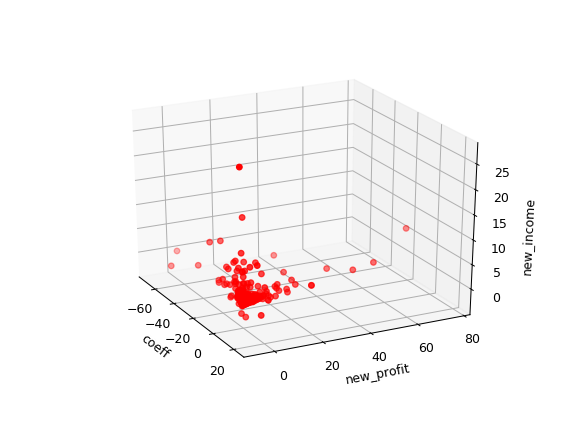

In [19]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#x = np.log2(df["income"])
#z = np.log2(df["profit"])
x = df["coeff"]
y = df["new_profit"]
z = df["new_income"]
ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('coeff')
ax.set_ylabel('new_profit')
ax.set_zlabel('new_income')

plt.show()

In [20]:
kmeans_model = KMeans(n_clusters=4, random_state=1).fit(df)
labels = kmeans_model.predict(df)

In [21]:
k_means = labels

<IPython.core.display.Javascript object>


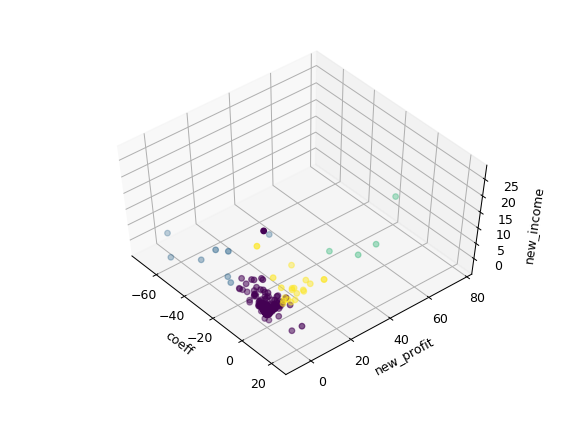

In [22]:
fig = plt.figure()
ax = fig.gca(projection='3d')               # to work in 3d


x = df["coeff"]
y = df["new_profit"]
z = df["new_income"]
ax.scatter(x, y, z, c=labels, marker='o')

ax.set_xlabel('coeff')
ax.set_ylabel('new_profit')
ax.set_zlabel('new_income')

plt.show()

In [23]:
#datasets.load_iris(return_X_y=True)
X = df.values
print(metrics.silhouette_score(X, labels, metric='euclidean'))
print(davies_bouldin_score(X, labels))

0.7543510843151472
0.5985044762960663


C:\Users\yaoxinyu\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [24]:
dbscan = DBSCAN(eps=4,min_samples=20)
clusters = dbscan.fit_predict(df)

In [25]:
dbscan = clusters

<IPython.core.display.Javascript object>


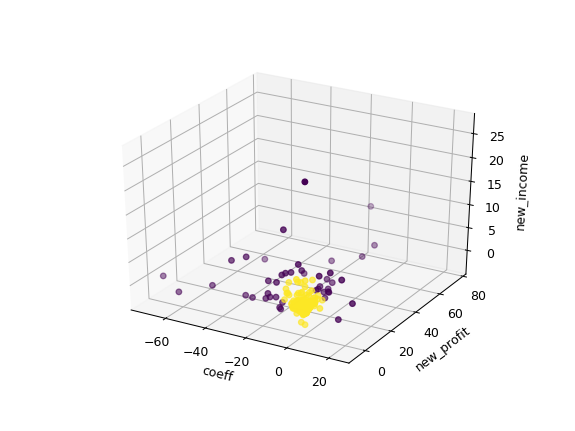

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#x = np.log2(df["income"])
#z = np.log2(df["profit"])
x = df["coeff"]
y = df["new_profit"]
z = df["new_income"]
ax.scatter(x, y, z, c=clusters, marker='o')

ax.set_xlabel('coeff')
ax.set_ylabel('new_profit')
ax.set_zlabel('new_income')

plt.show()

In [27]:
X = df.values
print(metrics.silhouette_score(X, clusters, metric='euclidean'))
print(davies_bouldin_score(X, clusters))

0.7931169972302395
1.4708707240504992


C:\Users\yaoxinyu\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [28]:
clusters2 = AgglomerativeClustering(n_clusters=4).fit_predict(df)

<IPython.core.display.Javascript object>


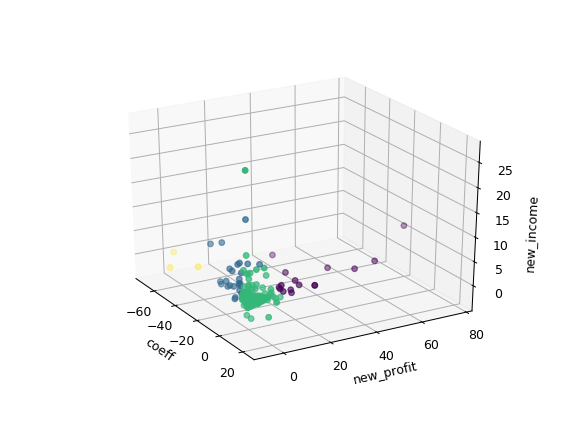

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#x = np.log2(df["income"])
#z = np.log2(df["profit"])
x = df["coeff"]
y = df["new_profit"]
z = df["new_income"]
ax.scatter(x, y, z, c=clusters2, marker='o')

ax.set_xlabel('coeff')
ax.set_ylabel('new_profit')
ax.set_zlabel('new_income')
plt.show()

In [34]:
agg=clusters2

In [35]:
X = df.values
print(metrics.silhouette_score(X, clusters2, metric='euclidean'))
print(davies_bouldin_score(X, clusters2))

0.7662924338861923
0.6862684879775576


C:\Users\yaoxinyu\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [36]:
from sklearn.cluster import MiniBatchKMeans
MBK = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=20, max_iter=10).fit(df)
cluster3 = MBK.predict(df)

<IPython.core.display.Javascript object>


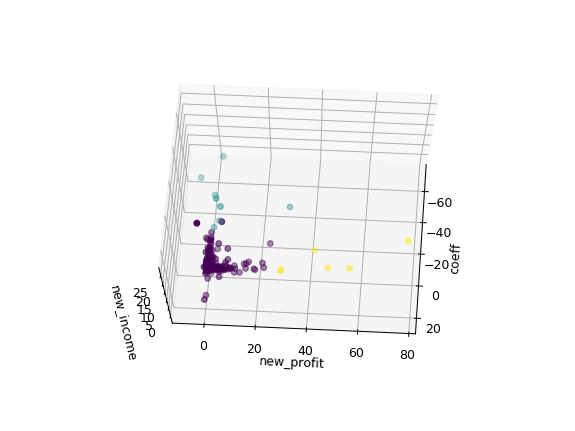

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = df["coeff"]
y = df["new_profit"]
z = df["new_income"]
ax.scatter(x, y, z, c=cluster3, marker='o')

ax.set_xlabel('coeff')
ax.set_ylabel('new_profit')
ax.set_zlabel('new_income')

plt.show()

In [38]:
minbatch = cluster3

In [39]:
X = df.values
print(metrics.silhouette_score(X, cluster3, metric='euclidean'))
print(davies_bouldin_score(X, cluster3))

0.880570404709579
0.530828916285731


C:\Users\yaoxinyu\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [40]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=5, assign_labels="discretize", random_state=0, gamma = 100).fit(df)


C:\Users\yaoxinyu\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


<IPython.core.display.Javascript object>


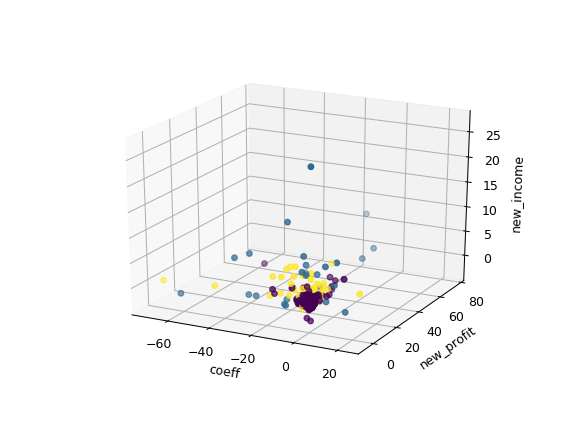

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = df["coeff"]
y = df["new_profit"]
z = df["new_income"]
ax.scatter(x, y, z, c=clustering.labels_, marker='o')

ax.set_xlabel('coeff')
ax.set_ylabel('new_profit')
ax.set_zlabel('new_income')

plt.show()

In [42]:
X = df.values
print(metrics.silhouette_score(X, clustering.labels_, metric='euclidean'))
print(davies_bouldin_score(X, cluster3))

0.627084392878441
0.530828916285731


C:\Users\yaoxinyu\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [43]:
df1 = pd.read_csv('business.csv')

In [44]:
df1.shape

(528, 6)

In [45]:
df1.tail()

,company_id,profit,income,outcome,number_accounts,coeff
523,fd253ffb-0a1f-4e80-94d8-e5527a8cb157,-996.225722,554070.161727,555066.387448,24,-412.565402
524,fd333c9a-bd89-4a59-8528-273d05418c9d,18016.448277,387706.729633,369690.281356,6,-604.481030
525,fd35e05b-1a3a-43bb-92a3-b6920f8bc08c,-165.992629,118195.877036,118361.869665,6,-68.900166
526,ff3c64e2-35f7-4b94-86ca-39c73eb48e73,89217.735064,102877.393892,13659.658827,12,-38.042948
527,ff436d63-450a-4f45-925f-c908554883bd,11559.007436,139950.702183,128391.694747,6,-118.235668


In [46]:
result = pd.concat([df1, pd.DataFrame(k_means), pd.DataFrame(agg), pd.DataFrame(minbatch)], axis=1, sort=False)

In [47]:
result.tail(10)

,company_id,profit,income,outcome,number_accounts,coeff,0,0,0
518,fba87679-1ab0-4dab-a848-90a21b0dd14f,9100.215757,1.053692e+06,1.044592e+06,8,-1906.206290,0,1,0
519,fbbf7084-ea24-493e-8b92-42fb7240b750,851.015413,8.960218e+04,8.875117e+04,3,-121.972269,0,2,0
520,fc01dd84-4458-4f82-b74a-efaf3dfef02e,6530.779811,4.494170e+05,4.428862e+05,27,-1105.668786,0,2,0
521,fc9e4cbd-6878-4928-a69f-70f5f6ff5bec,34979.474291,7.045324e+04,3.547376e+04,9,-8.631768,0,2,0
522,fcf6bb77-0cea-46e3-b6e1-1a1f0a343b4e,18920.388436,5.662276e+04,3.770237e+04,12,-35.524989,0,2,0
523,fd253ffb-0a1f-4e80-94d8-e5527a8cb157,-996.225722,5.540702e+05,5.550664e+05,24,-412.565402,0,2,0
524,fd333c9a-bd89-4a59-8528-273d05418c9d,18016.448277,3.877067e+05,3.696903e+05,6,-604.481030,0,2,0
525,fd35e05b-1a3a-43bb-92a3-b6920f8bc08c,-165.992629,1.181959e+05,1.183619e+05,6,-68.900166,0,2,0
526,ff3c64e2-35f7-4b94-86ca-39c73eb48e73,89217.735064,1.028774e+05,1.365966e+04,12,-38.042948,3,2,0
527,ff436d63-450a-4f45-925f-c908554883bd,11559.007436,1.399507e+05,1.283917e+05,6,-118.235668,0,2,0


In [48]:
result.shape

(528, 9)

In [49]:
result.columns = ['company_id', 'daily_profit', "daily_income", "daily_outcome", "number_accounts", "coefficients", "K_means", "Agglomerative", "Min_Batch"]

In [50]:
import collections
counter=collections.Counter(k_means)
print(counter)

Counter({0: 494, 3: 22, 1: 8, 2: 4})


In [51]:
counter=collections.Counter(agg)
print(counter)

Counter({2: 485, 1: 24, 0: 16, 3: 3})


In [52]:
counter=collections.Counter(minbatch)
print(counter)

Counter({0: 514, 1: 8, 2: 6})


In [53]:
result.loc[(result['K_means'] == 0)]# & result['Agglomerative']==1 & result['minbatch']==1)]

,company_id,daily_profit,daily_income,daily_outcome,number_accounts,coefficients,K_means,Agglomerative,Min_Batch
0,00415952-3309-4e6b-af4b-b1c02dc2d08b,82.057523,5.807813e+03,5.725756e+03,1,-0.731327,0,2,0
1,009f7f82-f9be-470a-8df0-1e2043829cd5,97.237667,3.600900e+04,3.591176e+04,4,-58.881011,0,2,0
2,00c0d1bb-f1fa-4b19-bd3c-d0aa04fdbf69,-215.075508,8.492731e+04,8.514239e+04,7,21.719234,0,2,0
3,02246f3d-262e-4fa6-9db6-b98df684b210,7291.799574,7.010486e+05,6.937568e+05,7,-1577.854133,0,1,0
4,0245c701-833d-419c-9ad4-64bff731a0b6,7419.584451,1.240406e+04,4.984475e+03,5,-20.439171,0,2,0
5,0301a508-35e1-4202-a969-c46d19209a27,2157.014158,1.422370e+05,1.400800e+05,3,-249.842216,0,2,0
7,0458a125-7a87-4403-9d41-d55e36f7610b,7037.661755,1.272188e+04,5.684220e+03,4,8.956116,0,2,0
8,0522d377-b889-4398-8582-e92aebd0aabe,118.887290,5.858214e+04,5.846326e+04,16,-129.508667,0,2,0
9,05a27638-6b0b-475c-bc65-a51d96cc3ae9,12086.629390,3.710072e+05,3.589206e+05,38,-943.388601,0,2,0
10,0889e065-65c1-4867-8d21-7471436b255f,9835.408440,5.647007e+05,5.548653e+05,25,-3720.007886,0,1,0


In [54]:
result.loc[(result['K_means'] == 3)]

,company_id,daily_profit,daily_income,daily_outcome,number_accounts,coefficients,K_means,Agglomerative,Min_Batch
6,031b016e-2b68-4358-8b9d-73c77e715f6d,141958.515992,2.457082e+05,1.037497e+05,10,-865.690881,3,0,0
18,0a6db64d-5fe6-4265-8890-e24c71188e21,147045.915446,3.041719e+05,1.571259e+05,19,-114.363322,3,2,0
51,1b1514e3-b1b1-4128-90ba-d4c152ba7ab8,32429.261806,5.975950e+04,2.733023e+04,2,18.501525,3,0,0
59,1fa6cd42-ebeb-4b51-b6b2-22929268d653,210267.804434,5.600091e+05,3.497413e+05,11,-508.393864,3,0,0
77,29d5cd5f-1be2-4c5f-9754-ae951d243751,67696.320927,2.967352e+05,2.290389e+05,8,160.814665,3,2,0
93,30c2334e-bc56-4eee-913f-ce010c66e63f,241345.723292,4.166277e+05,1.752820e+05,25,-49.390182,3,2,0
97,33872c8f-ef95-41ca-a592-2bc40cbefeb7,116223.149344,1.218758e+05,5.652659e+03,7,-19.245277,3,0,0
131,41a02db9-cf41-47fd-a8e4-9a356b3bc9ad,305687.100285,4.874440e+05,1.817569e+05,27,406.339011,3,2,0
161,4ed9b50c-2448-48ec-83e2-896358239dea,66897.118569,1.454269e+05,7.852973e+04,5,6.944009,3,0,0
217,6eec664a-0d97-4640-88e6-f7b1d3530157,32427.363498,1.618853e+06,1.586426e+06,6,-2717.176915,3,1,0


In [55]:
result.loc[(result['K_means'] == 2)]

,company_id,daily_profit,daily_income,daily_outcome,number_accounts,coefficients,K_means,Agglomerative,Min_Batch
57,1ecbbc81-992e-4a6b-a5af-448f1b05c87b,1.968920e+05,2.809583e+05,8.406633e+04,4,-73.625442,2,0,2
134,42b22cba-e4f9-4e66-bd37-c8f0b8bc70e5,1.300439e+06,2.391758e+06,1.091319e+06,19,-3104.246625,2,0,2
249,813751d5-62b8-44e4-8d54-4465b1042429,2.502918e+05,3.197130e+05,6.942125e+04,6,-241.360610,2,0,2
445,d7a49961-b255-42b2-a387-1a9ffcd19071,1.094941e+05,1.101313e+05,6.371795e+02,3,-2518.481019,2,0,2


In [56]:
result.loc[(result['K_means'] == 1)]

,company_id,daily_profit,daily_income,daily_outcome,number_accounts,coefficients,K_means,Agglomerative,Min_Batch
89,2d5b01f2-c45b-4479-8077-854ad4602184,-22178.396362,3.303397e+03,2.548179e+04,4,-11397.138560,1,3,1
178,570b1253-59f9-4d5e-b2fc-ac22488662ca,1627.425398,1.522759e+05,1.506485e+05,6,-8943.351070,1,3,1
180,57c72611-c9be-4f6b-be8d-562f549953fe,17705.410596,1.441676e+06,1.423970e+06,11,-7201.998688,1,1,1
213,6bc2555d-acab-405f-bfb0-465751ffa23f,3044.445272,2.049890e+04,1.745446e+04,2,-14102.981751,1,3,1
404,c4199cf9-3294-4a66-ac37-5c788c9a0218,107212.046495,1.358620e+05,2.864994e+04,4,-7758.161929,1,0,1
434,d3b7d6ef-e63a-44f6-b7f3-a5801dcfd44d,44974.352667,1.916645e+06,1.871671e+06,13,-6041.216879,1,1,1
461,df36c47a-2c9e-4a5e-aaaf-0a2c0877ed86,5018.547114,1.003802e+04,5.019475e+03,2,-6012.765025,1,1,1
501,f3378499-62e2-40f5-9d6e-76fac2f492a9,24825.944388,3.194807e+05,2.946547e+05,28,-5093.382167,1,1,1


In [57]:
result.loc[(result['Agglomerative'] == 2)].mean()

daily_profit         8523.652926
daily_income       113772.086262
daily_outcome      105248.433336
number_accounts         8.134021
coefficients          -66.542700
K_means                 0.055670
Agglomerative           2.000000
Min_Batch               0.000000
dtype: float64

In [58]:
result.loc[(result['Agglomerative'] == 0)].mean()

daily_profit       227143.803249
daily_income       421463.295387
daily_outcome      194319.492138
number_accounts         8.250000
coefficients        -1184.769298
K_means                 2.625000
Agglomerative           0.000000
Min_Batch               0.812500
dtype: float64

In [59]:
result.loc[(result['Agglomerative'] == 1)].mean()

daily_profit        22144.131752
daily_income       930729.083427
daily_outcome      908584.951675
number_accounts        15.500000
coefficients        -2941.828531
K_means                 0.416667
Agglomerative           1.000000
Min_Batch               0.166667
dtype: float64

In [60]:
result.loc[(result['Agglomerative'] == 3)].mean()

daily_profit       -5835.508564
daily_income       58692.730268
daily_outcome      64528.238831
number_accounts        4.000000
coefficients      -11481.157127
K_means                1.000000
Agglomerative          3.000000
Min_Batch              1.000000
dtype: float64

In [61]:
result.to_csv("new_result.csv",index=False)